In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'F:\CodingNest\DecisionTrees\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Exploratory Analysis

### 1.See datatypes and check for null Entry
### 2. See categorical columns and convert to numerical if possible (get_dummies or encoder)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [8]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [9]:
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


## Defining X and y

In [11]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [12]:
X.shape

(1470, 30)

In [13]:
y.shape

(1470,)

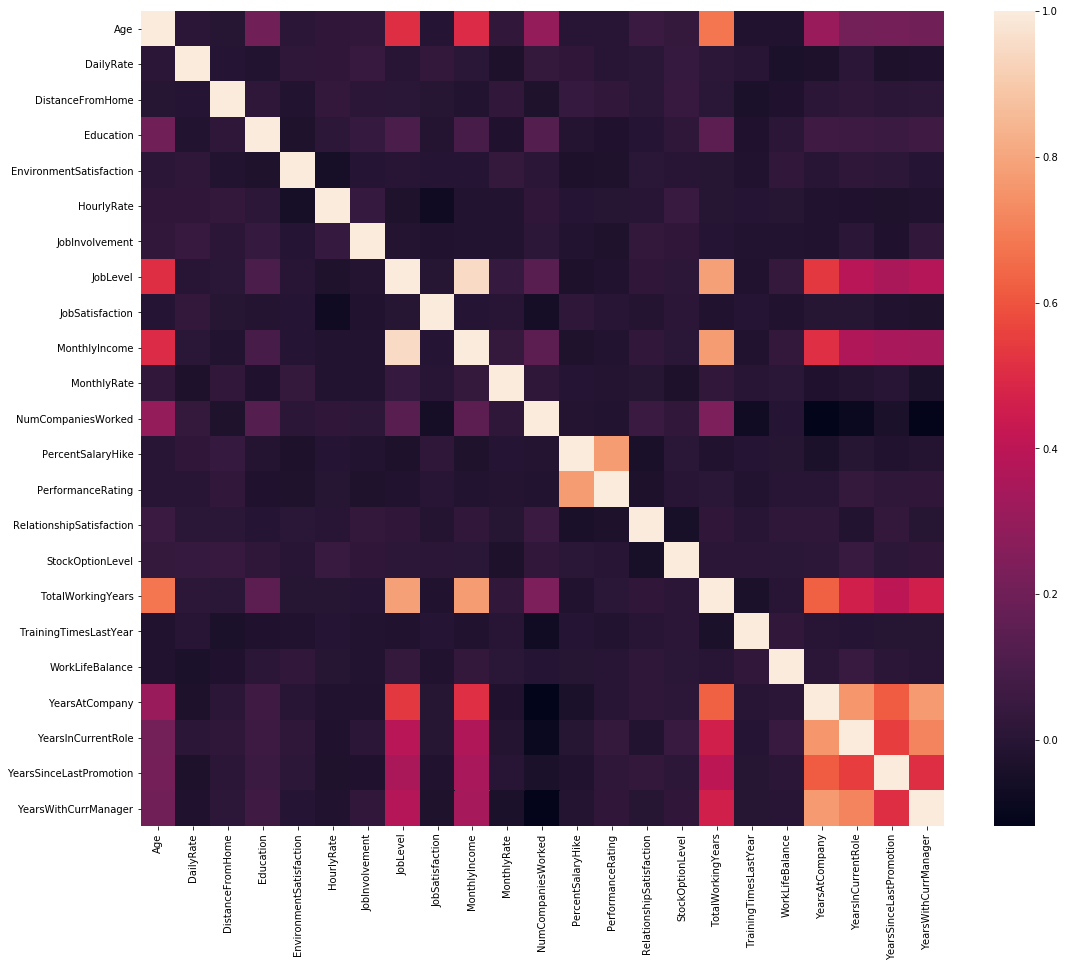

In [14]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=False)

# cannot deduce anything

## Using pandas.get_dummies
### To conver object to numerical data

imd_BusinessTravel=pd.get_dummies(df['BusinessTravel'],prefix='BusinessTravel',drop_first=True)
imd_Department=pd.get_dummies(df['Department'],prefix='Department',drop_first=True)
imd_EducationField=pd.get_dummies(df['EducationField'],prefix='EducationField',drop_first=True)
imd_Gender = pd.get_dummies(df['Gender'], prefix='Gender',drop_first=True)
imd_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole',drop_first=True)
imd_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus',drop_first=True)
imd_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime',drop_first=True)

In [22]:
#df1=pd.concat([imd_BusinessTravel,imd_Department,imd_EducationField,imd_Gender,imd_JobRole,imd_MaritalStatus,imd_OverTime,df.select_dtypes(['int64'])], axis=1)

In [23]:
#df1.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,4,80,1,6,3,3,2,2,2,2


In [19]:
#imd_Department

,Department_Research & Development,Department_Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [15]:
df1=X

In [16]:
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [17]:
df1.shape

(1470, 30)

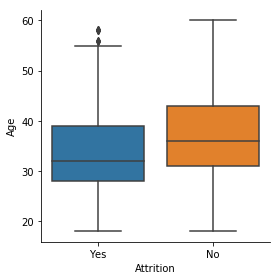

In [18]:
sns.factorplot(data=df,x='Attrition',y='Age',kind='box')

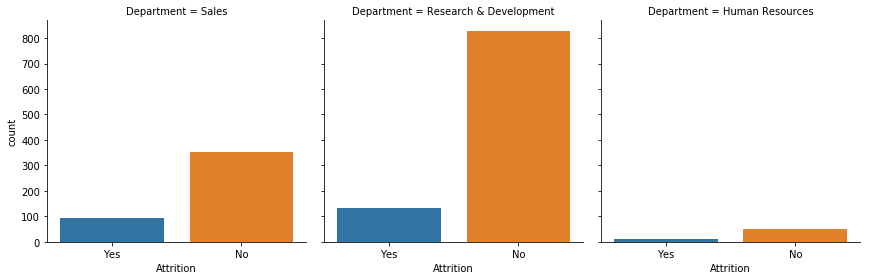

In [19]:
sns.factorplot(data=df,col='Department',x='Attrition',kind='count')

# Encoding

Converting target variable in numerical format

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
y_std=le.fit_transform(df['Attrition'])
print(le.classes_)

['No' 'Yes']


In [22]:
y_std

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
df1.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
!pip install missingno

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
import missingno as msno

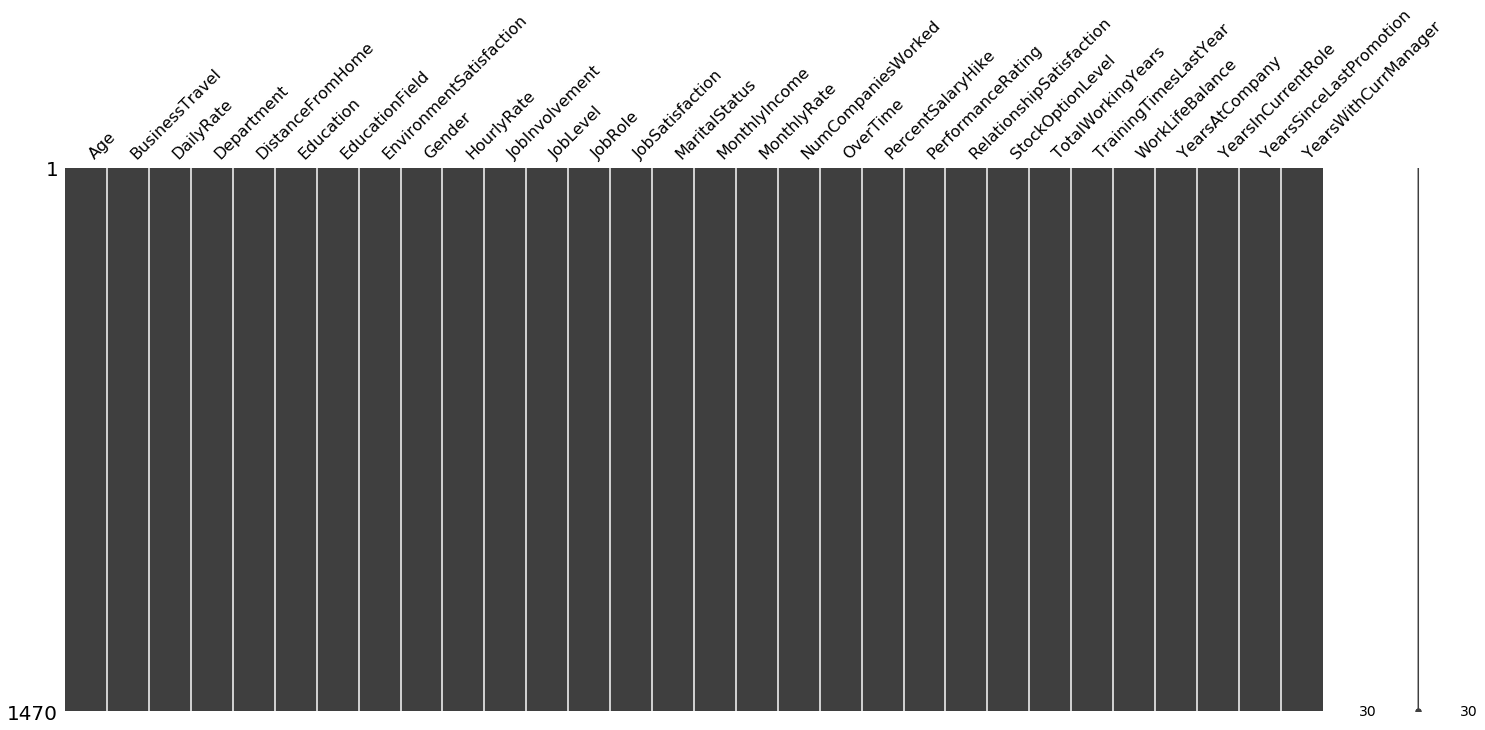

In [26]:
msno.matrix(df1)  # check for missing or null entry

# Check Categorical dataset and apply Label Encoder wherever possible

In [27]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [28]:
cat_col=df1.select_dtypes(['object'])
cat_col.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

# Encoder for X

Converting independent variable to numerical format

In [29]:
def transform(feature):
    df1[feature]=le.fit_transform(df1[feature])
    print(le.classes_)

In [30]:
for col in cat_col.columns:
    transform(col)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [31]:
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


## Categorical columns now have been transformed to numerical

The Machine Learning model can now understand the data and can make hypothesis

In [32]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(df1,y,test_size=0.3)

# Import models, techniques

Models:- SVM, Desicion Tree, Gradient boost classifier, Logistic regression etc.

techniques:- gridSearchCV, K-Fold, Accuray Metrics etc.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler

In [77]:
from sklearn.metrics import classification_report

In [80]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [35]:
scalar = StandardScaler()
scaled_df1=scalar.fit_transform(df1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(scaled_df1,y_std,test_size=0.3)

# Collecting accuracy scores

** Create list objects for all parameters and append it iteratively **

acc=[]
prec=[]
rec=[]
auroc=[]

In [101]:
acc=[]
prec=[]
rec=[]
auroc=[]

# Defining function for calculating accuracy

In [78]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

# Support Vector Classifier

In [38]:
scvm_vlf=SVC()

In [65]:
params_grid = {"C": [1,2,3,4,5,6,31],
               "kernel": ['rbf','linear','poly'],
               "degree": [1,2, 3,4]
              }

In [66]:
grid_search1 = GridSearchCV(scvm_vlf, params_grid,
                           n_jobs=-1,
                           verbose=1)

In [67]:
grid_search1.fit(X_train,y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    9.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 31], 'kernel': ['rbf', 'linear', 'poly'], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [68]:
grid_search1.best_score_

0.8658892128279884

In [69]:
grid_search1.best_estimator_.get_params()

{'C': 3,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
scv_clf =SVC(C= 3,degree= 1,kernel= 'rbf')

In [71]:
scv_clf.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
y_p1=scv_clf.predict(X_test)

In [102]:
    acc.append(accuracy_score(y_test,y_p1))
    prec.append(precision_score(y_test,y_p1))
    rec.append(recall_score(y_test,y_p1))
    auroc.append(roc_auc_score(y_test,y_p1))

In [74]:
acc

[0.854875283446712]

In [75]:
prec

[0.7083333333333334]

In [76]:
confusion_matrix(y_test,y_p1)

array([[360,   7],
       [ 57,  17]], dtype=int64)

In [81]:
print_score(scv_clf,X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9728

Classification Report: 
              precision    recall  f1-score   support

          0       0.97      1.00      0.98       866
          1       0.99      0.83      0.91       163

avg / total       0.97      0.97      0.97      1029


Confusion Matrix: 
 [[865   1]
 [ 27 136]]

Average Accuracy: 	 0.8581
Accuracy SD: 		 0.0240


In [82]:
print_score(scv_clf,X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8549

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.98      0.92       367
          1       0.71      0.23      0.35        74

avg / total       0.84      0.85      0.82       441


Confusion Matrix: 
 [[360   7]
 [ 57  17]]



# Descion Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
clf_dt_temp=DecisionTreeClassifier()

In [85]:
params_grid_dt = {"criterion" : ['gini','entropy'],
                  "max_leaf_nodes" : list(range(2,75)),
                  "min_samples_split" : [2,3,4],
                  "min_samples_leaf" : list(range(5,50))
    
}

In [86]:
grid_search2=GridSearchCV(clf_dt_temp,params_grid_dt,n_jobs=-1,verbose=1)

In [87]:
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 19710 candidates, totalling 59130 fits


[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 7991 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 20491 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 37991 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 59130 out of 59130 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,...25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [88]:
grid_search2.best_score_

0.8542274052478134

In [89]:
grid_search2.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 24,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [98]:
clf_dt=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=8,min_samples_leaf=24,min_samples_split=2)

In [99]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=24,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
y_p2=clf_dt.predict(X_test)

In [103]:
    acc.append(accuracy_score(y_test,y_p2))
    prec.append(precision_score(y_test,y_p2))
    rec.append(recall_score(y_test,y_p2))
    auroc.append(roc_auc_score(y_test,y_p2))

In [104]:
acc

[0.854875283446712, 0.8412698412698413]

In [105]:
print_score(clf_dt,X_train,y_train,X_test,y_test,train=True)

Train Result:

accuracy score: 0.8669

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.97      0.92       866
          1       0.68      0.30      0.42       163

avg / total       0.85      0.87      0.84      1029


Confusion Matrix: 
 [[843  23]
 [114  49]]

Average Accuracy: 	 0.8475
Accuracy SD: 		 0.0240


In [106]:
print_score(clf_dt,X_train,y_train,X_test,y_test,train=False)

Test Result:

accuracy score: 0.8413

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.97      0.91       367
          1       0.58      0.20      0.30        74

avg / total       0.81      0.84      0.81       441


Confusion Matrix: 
 [[356  11]
 [ 59  15]]



# Logistic Regression

In [107]:
clf_lr_temp=LogisticRegression()

In [125]:
params_grid_lr1={"penalty" : ['l2'],
                "C" : [0.001,0.009,0.01,0.09,0.1,0.9,1],
                "solver" : ['newton-cg', 'lbfgs', 'sag','saga']
    
}

In [126]:
grid_search3=GridSearchCV(clf_lr_temp,params_grid_lr1,n_jobs=-1,verbose=1)

In [127]:
grid_search3.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    2.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.009, 0.01, 0.09, 0.1, 0.9, 1], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [128]:
grid_search3.best_score_

0.8639455782312925

In [129]:
grid_search3.best_estimator_.get_params()

{'C': 0.09,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [134]:
params_grid_lr2={"penalty" : ['l1'],
                "C" : [0.001,0.009,0.01,0.09,0.1,0.9,0.8,0.95,1],
                "solver" : ['liblinear', 'saga']
                                                }

In [135]:
grid_search4=GridSearchCV(clf_lr_temp,params_grid_lr2,n_jobs=-1)

In [136]:
grid_search4.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1'], 'C': [0.001, 0.009, 0.01, 0.09, 0.1, 0.9, 0.8, 0.95, 1], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
grid_search4.best_score_

0.8600583090379009

In [138]:
grid_search4.best_estimator_.get_params()

{'C': 0.9,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [139]:
clf_lr=LogisticRegression(C=0.09,penalty='l2',solver='newton-cg')

In [140]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
y_p3=clf_lr.predict(X_test)

In [142]:
    acc.append(accuracy_score(y_test,y_p2))
    prec.append(precision_score(y_test,y_p2))
    rec.append(recall_score(y_test,y_p2))
    auroc.append(roc_auc_score(y_test,y_p2))

In [143]:
d={'Modelling Algo':['SVC','Desicion Tree','Logistic Regression'],'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,SVC,0.854875,0.708333,0.229730,0.605328
1,Desicion Tree,0.841270,0.576923,0.202703,0.586365
2,Logistic Regression,0.841270,0.576923,0.202703,0.586365
